# **Paola** **Guzmán**

**Clasificación de precios de celulares**

## Dataset

## 1. Lectura de los datos con librerias

# **REGRESIÓN LOGÍSTICA**

In [1]:
#Importamos las librerías necesarias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importamos el dataset que evaluaremos

data = pd.read_csv("/content/train.csv")
print(len(data))
print(data.head)


2000
<bound method NDFrame.head of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:

X = data[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']]
y = data['price_range']

In [6]:
# Dividimos los datos de dataset Train, en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1600, 20)
(400, 20)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#Evaluamos el modelo

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Se predice los valores de "price_range" en los datos de entrenamiento

y_pred = model.predict(X_test)

#Se evalua la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975


In [10]:
#Se genera el reporte de clasificación

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



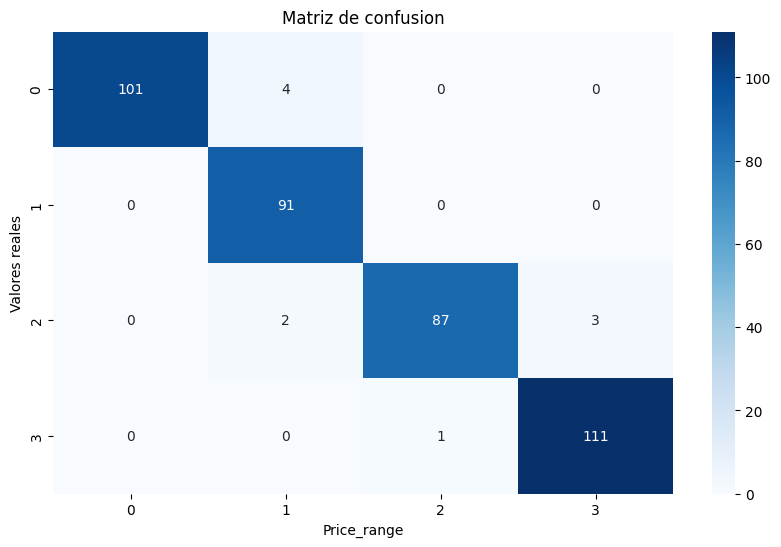

Confusion Matrix:
 [[101   4   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]


In [11]:
#Generamos la matriz de confusión

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Price_range')
plt.ylabel('Valores reales')
plt.title('Matriz de confusion')
plt.show()
print("Confusion Matrix:\n", matrix)

In [12]:
#Se imprime las predicciones

print(data['price_range'])

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


# **REGRESIÓN LINEAL**

In [13]:
#Se importan las librerias

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [14]:
#Se importa el dataset de entrenamiento

data = pd.read_csv("/content/train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<ipython-input-16-8f25d0d2f6d4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-16-8f25d0d2f6d4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-16-8f25d0d2f6d4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-16-8f25d0d2f6d4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-16-8f25d0d2f6d4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-16-8f25d0d2f6d4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i]

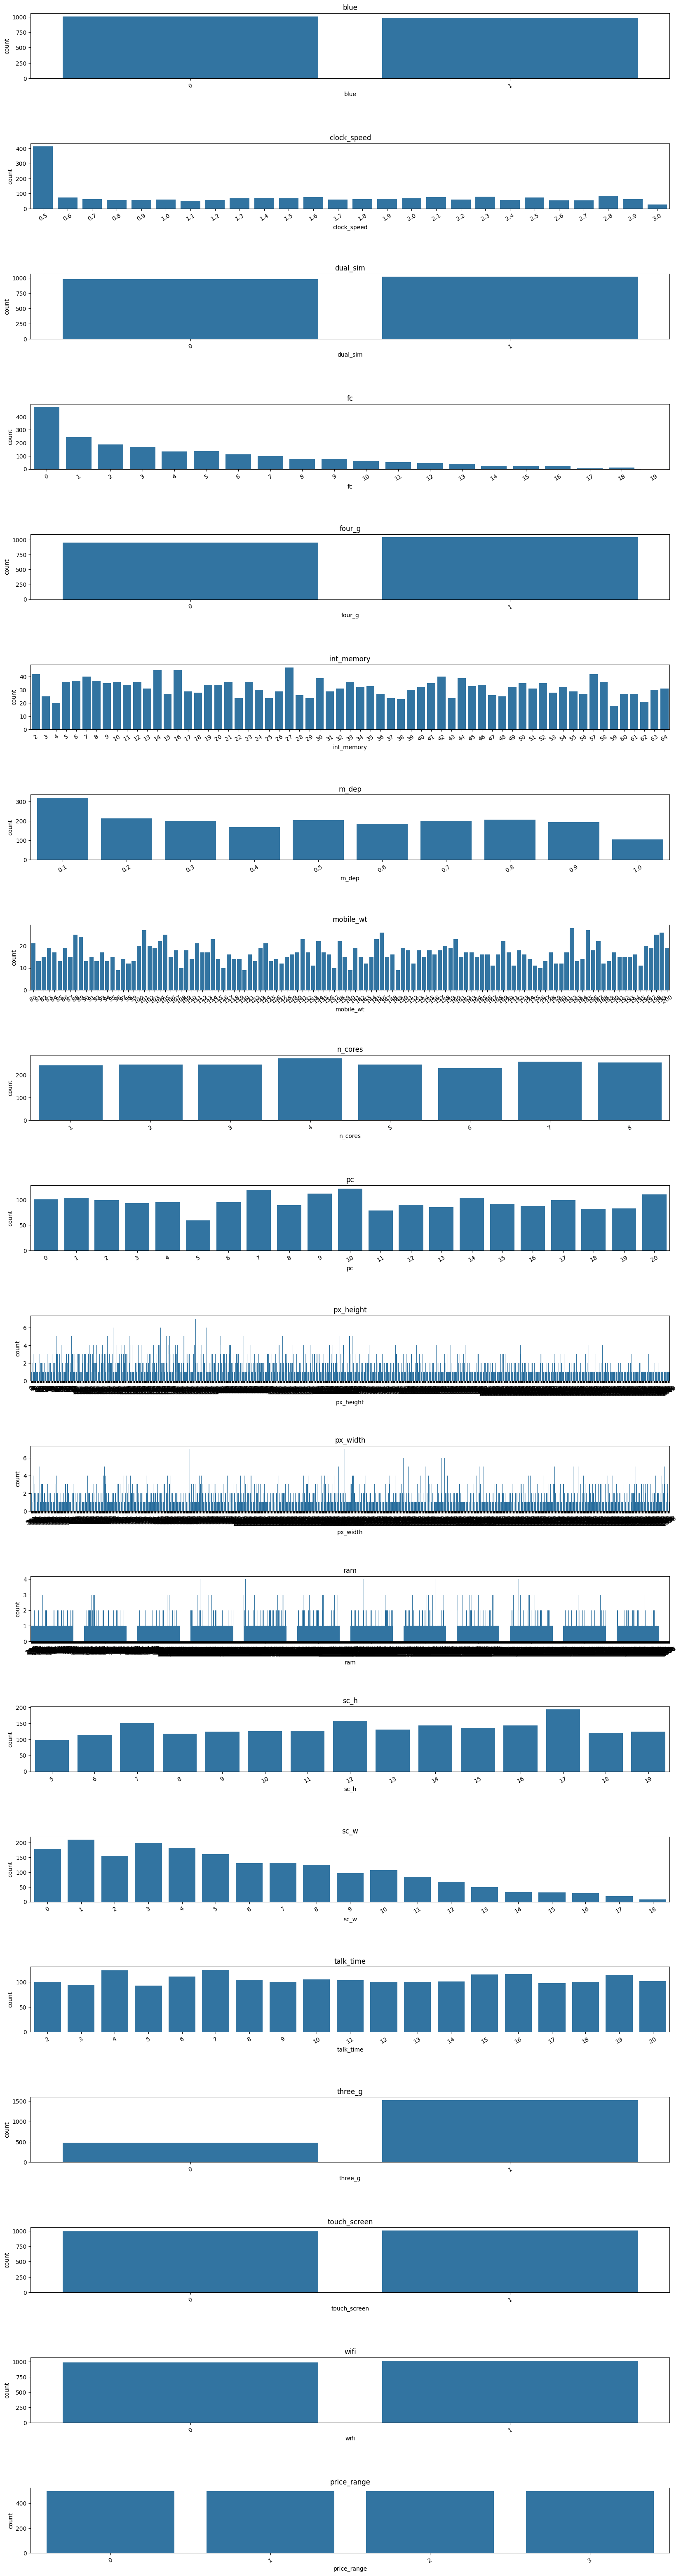

In [16]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt',
            'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

# Adjust the subplot grid to accommodate all 20 categories
fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(20,80)) # Increased figure height for better visualization
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

plt.show() # Display the plot

In [17]:
#Se grafican algunas columnas del dataset

figure = px.pie(data, values='price_range', names='four_g', hole=0.5,)
figure.show()

In [18]:
#Se grafican algunas columnas del dataset

figure = px.pie(data, values='price_range', names='n_cores', hole=0.5)
figure.show()

In [19]:
#Se grafican algunas columnas del dataset

figure = px.pie(data, values='price_range', names='touch_screen', hole=0.5)
figure.show()

In [20]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [21]:
#Determinamos cuales son las variables independientes y dependientes

X = np.array(data[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']])
y = np.array(data['price_range'])

In [22]:
#Separamos los datos de entrenamiento en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# evaluamos el modelo de regresión lineal

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [24]:
pip install pandas

In [25]:
#Evaluamos el coeficiente de determinación

r2 = r2_score(y_test, y_pred)
print('Coeficiente de determinación (R^2):', r2)

Coeficiente de determinación (R^2): 0.9812627939984729


El resultado cercano a 1 del coeficiente de determinación indica que nuestro modelo se ajusta bastante bien a los datos proporcionados

In [26]:
#Cargamos el dataset de Test

data_test = pd.read_csv("/content/test.csv")
print(len(data_test))
print(data_test.head)
print(type(data_test))


1000
<bound method NDFrame.head of        id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1         

In [27]:
#Imprimos la información general del dataframe de test compuesta por 1000 registros

print(data_test.info())
data_test_array = np.array(data_test[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']])
print(data_test_array.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [28]:
#Imprimimos el arreglo de numpy

data_test_array

array([[1.043e+03, 1.000e+00, 1.800e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.410e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.807e+03, 1.000e+00, 2.800e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.185e+03, 0.000e+00, 1.400e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.533e+03, 1.000e+00, 5.000e-01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.270e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [29]:
# ejecutamos  el modelo de prediccion sobre los datos de prueba del arreglo de numpy
prediction = modelo.predict(data_test_array)
print(prediction)
print(len(prediction))

[ 2.51874472e+00  2.85691348e+00  2.17989921e+00  3.40980065e+00
  1.23238144e+00  2.74468008e+00  3.57087901e+00  1.03603291e+00
  2.61485667e+00  1.99527599e-02  3.33774318e+00  3.19665710e+00
 -3.28692801e-03  4.28550019e-01  1.95543349e+00  4.27613067e-01
  1.86461460e+00  1.14636101e+00  3.09942415e+00  1.59011774e+00
  7.69676511e-01  2.47730315e+00  1.33713940e+00  1.29792969e+00
  3.20319339e+00  2.92253356e-02  2.06558969e+00 -3.26907069e-01
  2.64644042e+00  2.95788199e-02  2.15959310e+00  1.85215483e-01
  2.86241897e+00  1.88089910e-01  5.52557337e-01  9.79812149e-01
  2.76943387e+00  1.21137988e+00  2.14234776e+00  9.71136121e-01
  1.13400535e+00  1.74250655e+00 -3.70307001e-01 -3.75577946e-01
  1.94669328e-02  8.56741804e-01  3.98663407e-01  2.62058438e+00
  1.03817608e+00  2.17086981e+00  1.39136596e+00 -3.32929372e-02
  2.36234780e+00  4.00562054e-01  3.13911482e+00  7.01080975e-01
  3.04789032e+00  1.12344178e+00  7.15301989e-01  3.17143977e+00
  3.21514821e+00  2.51552

In [30]:
# Imprimimos el primer registro del arreglo de numpy del datatest
print(data_test_array[0])
print(type(data_test_array[0]))

[1.043e+03 1.000e+00 1.800e+00 1.000e+00 1.400e+01 0.000e+00 5.000e+00
 1.000e-01 1.930e+02 3.000e+00 1.600e+01 2.260e+02 1.412e+03 3.476e+03
 1.200e+01 7.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00]
<class 'numpy.ndarray'>


In [60]:
# con el ciclo for probamos el modelo de prediccion para cada uno de los registros del datatest
predicciones = []
for X in data_test_array:
  prediction = modelo.predict(X.reshape(1, -1))
  print(X, prediction)
  predicciones.append(prediction)

print(len(prediction))
print(type(prediction))
print(prediction[0])
print(predicciones[1])
print(predicciones[2])

[1.043e+03 1.000e+00 1.800e+00 1.000e+00 1.400e+01 0.000e+00 5.000e+00
 1.000e-01 1.930e+02 3.000e+00 1.600e+01 2.260e+02 1.412e+03 3.476e+03
 1.200e+01 7.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00] [2.51874472]
[8.410e+02 1.000e+00 5.000e-01 1.000e+00 4.000e+00 1.000e+00 6.100e+01
 8.000e-01 1.910e+02 5.000e+00 1.200e+01 7.460e+02 8.570e+02 3.895e+03
 6.000e+00 0.000e+00 7.000e+00 1.000e+00 0.000e+00 0.000e+00] [2.85691348]
[1.807e+03 1.000e+00 2.800e+00 0.000e+00 1.000e+00 0.000e+00 2.700e+01
 9.000e-01 1.860e+02 3.000e+00 4.000e+00 1.270e+03 1.366e+03 2.396e+03
 1.700e+01 1.000e+01 1.000e+01 0.000e+00 1.000e+00 1.000e+00] [2.17989921]
[1.546e+03 0.000e+00 5.000e-01 1.000e+00 1.800e+01 1.000e+00 2.500e+01
 5.000e-01 9.600e+01 8.000e+00 2.000e+01 2.950e+02 1.752e+03 3.893e+03
 1.000e+01 0.000e+00 7.000e+00 1.000e+00 1.000e+00 0.000e+00] [3.40980065]
[1.434e+03 0.000e+00 1.400e+00 0.000e+00 1.100e+01 1.000e+00 4.900e+01
 5.000e-01 1.080e+02 6.000e+00 1.800e+01 7.490e+02 8.100e+02 

In [32]:
#Imprimimos las dimensiones del arreglo de numpy y de los datos de entrenamiento
print(data_test_array.shape)
print(X_train.shape)

(1000, 20)
(1600, 20)


In [33]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)
print("Shape of y_test:", X_test.shape)
print("Shape of y_pred:", X_train.shape)

Shape of y_test: (400,)
Shape of y_pred: (400,)
Shape of y_test: (400, 20)
Shape of y_pred: (1600, 20)


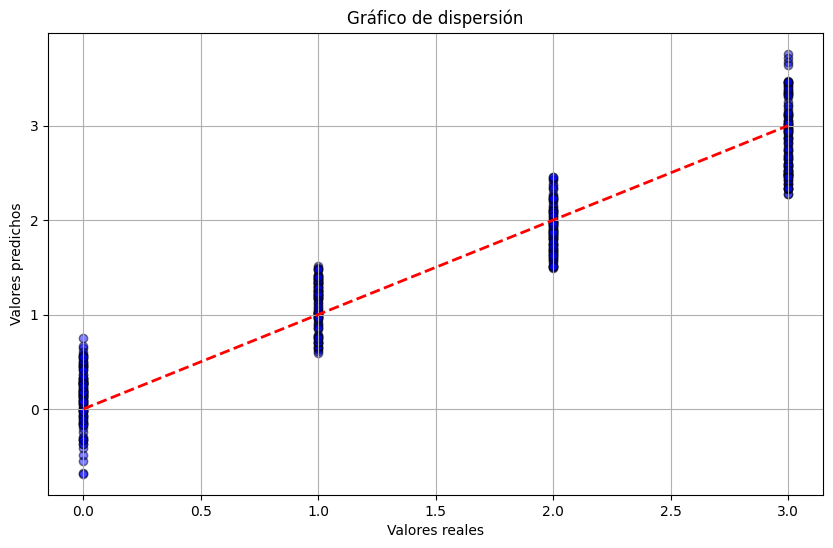

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Use y_test for reference line
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Gráfico de dispersión')
plt.grid(True)
plt.show()

In [37]:
r2 = metrics.r2_score(y_test, y_pred)
print('Coeficiente de determinación (R^2):', r2)

Coeficiente de determinación (R^2): 0.9215339010437135


In [38]:
mse = metrics.mean_squared_error(y_test, y_pred)
print('Error cuadrático medio (MSE):', mse)

Error cuadrático medio (MSE): 0.1046929021193068


In [39]:
rmse = np.sqrt(mse)
print('Raíz del error cuadrático medio (RMSE):', rmse)

Raíz del error cuadrático medio (RMSE): 0.32356282561398614


In [40]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Error absoluto medio (MAE):', mae)

Error absoluto medio (MAE): 0.2683009553746578


# **PERCEPTRON MULTICAPA**

# **1. Importación de librerías**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## **2. Importación del conjunto de datos**

In [42]:
data = pd.read_csv("/content/train.csv")

# **3. Lectura del conjunto de datos con pandas**

4. Visualización del conjunto de datos

In [43]:
X = data.drop('price_range', axis=1)
y = data['price_range']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=42)

In [47]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=42)

In [48]:
y_pred = mlp.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       105
           1       0.90      0.99      0.94        91
           2       0.93      0.93      0.93        92
           3       0.98      0.95      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



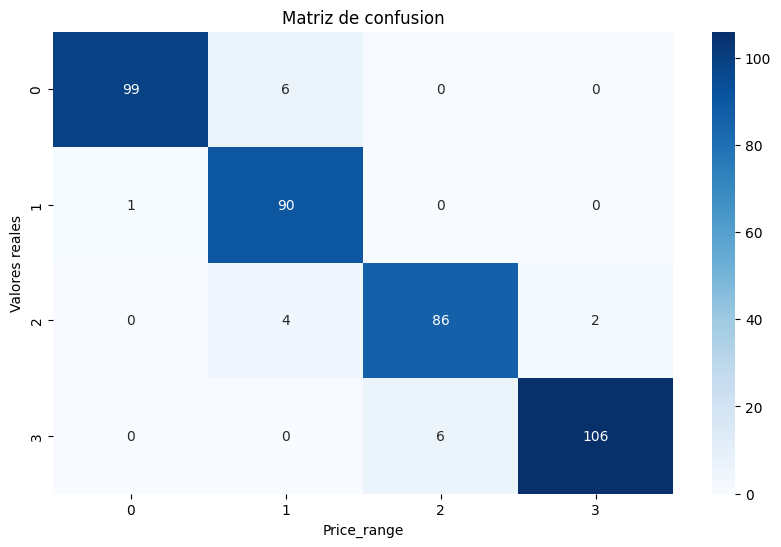

Confusion Matrix:
 [[ 99   6   0   0]
 [  1  90   0   0]
 [  0   4  86   2]
 [  0   0   6 106]]


In [50]:
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Price_range')
plt.ylabel('Valores reales')
plt.title('Matriz de confusion')
plt.show()
print("Confusion Matrix:\n", matrix)

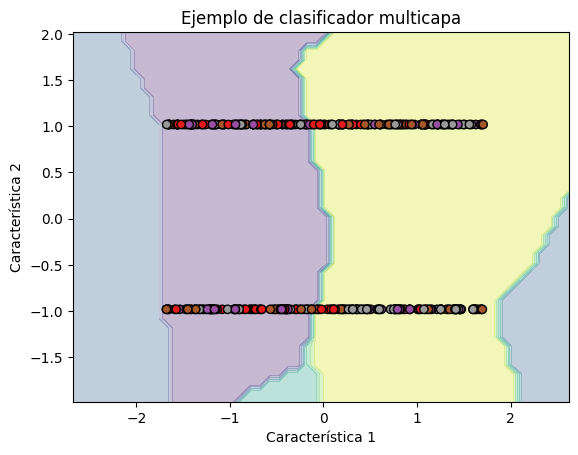

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

def plot_decision_regions(X, y, model_class, **kwargs):
    # Ajustar los límites de la gráfica
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Extraer los parámetros relevantes para el MLPClassifier
    hidden_layer_sizes = kwargs.pop('hidden_layer_sizes', (100,))
    max_iter = kwargs.pop('max_iter', 1000)
    random_state = kwargs.pop('random_state', None)

    model = model_class(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=random_state, **kwargs)
    model.fit(X, y)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.Set1)
    plt.title("Ejemplo de clasificador multicapa")
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.show()

# Ejemplo de uso
# Suponiendo que X_test y y_test son tus datos de prueba con solo 2 características
# Ajusta los parámetros del MLPClassifier según tu caso
plot_decision_regions(X_test[:, :2], y_test, model_class=MLPClassifier, hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
